
# Logistic Regression Project 


## Importing Libraries


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## Get the Data
**We are going to read an advertising.csv file and set it to a data frame called ad_data.**

In [78]:
ad_data = pd.read_csv('notebook/advertising.csv')

**Check the head of ad_data**

In [79]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [80]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

To see more of the information provided we are going to analyze some descriptive results 

<AxesSubplot:xlabel='Age', ylabel='Count'>

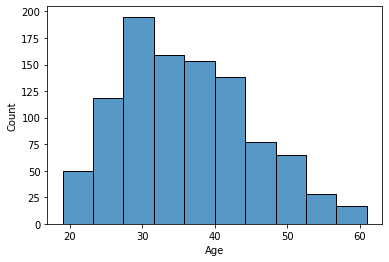

In [81]:
sns.histplot(data=ad_data, x="Age", bins= 10)

**Income vs Age**

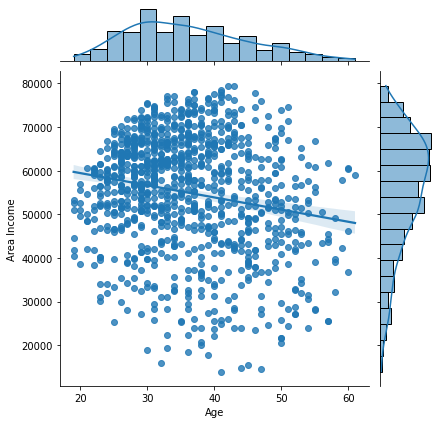

In [82]:
sns.jointplot(data=ad_data, x="Age", y="Area Income", kind="reg")

**Daily Time spent on site vs. Age.**

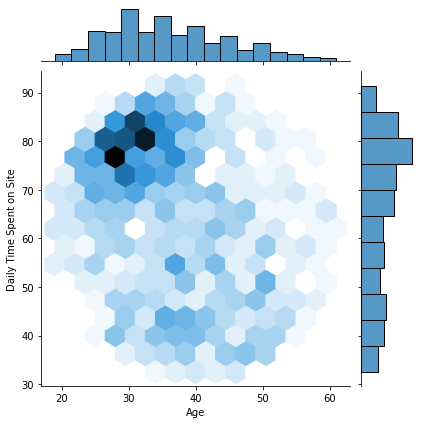

In [83]:
sns.jointplot(data=ad_data, x="Age", y="Daily Time Spent on Site", kind="hex")

**'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

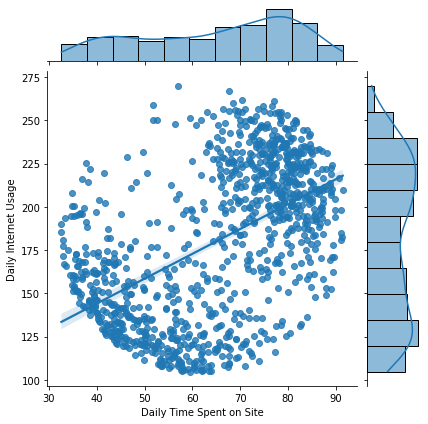

In [84]:
sns.jointplot(data=ad_data, x="Daily Time Spent on Site", y="Daily Internet Usage", kind="reg")

**pairplot with the hue defined by the 'Clicked on Ad' column feature.**

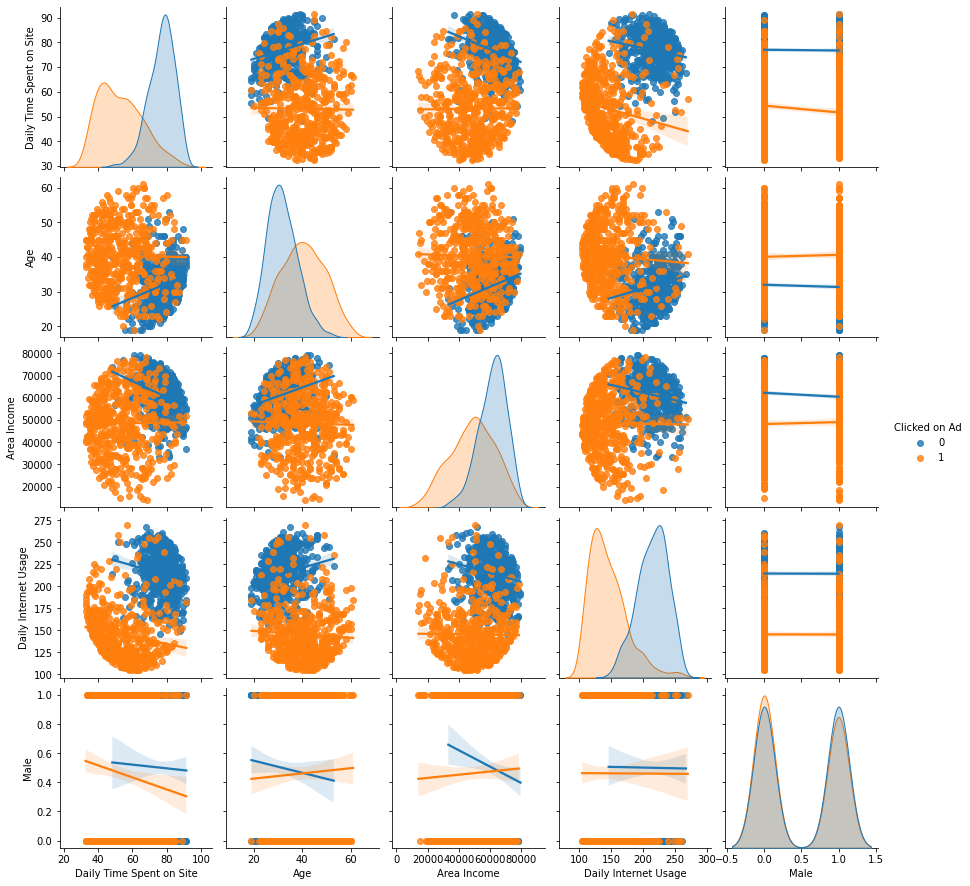

In [85]:
sns.pairplot(data=ad_data, hue="Clicked on Ad", kind="reg")

# Logistic Regression

Now it's time to do a train test split, and train our model

<AxesSubplot:>

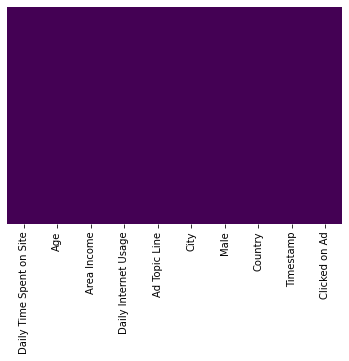

In [86]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [87]:
ad_data.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)


In [88]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


** Split the data into training set and testing set using train_test_split**

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1), 
                                                    ad_data['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

Now we need to train and fit a logistic regression model on the training set

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [93]:
predictions = logmodel.predict(X_test)

## Predictions and Evaluations
predict values for the testing data

In [94]:
from sklearn.metrics import classification_report

To see the how well our predictive model responds to the test data, we need to construct the correspondant measures of precision, accuracy and f1-score together with a confussion matrix

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



[Text(0.5, 1.0, 'Confussion Matrix')]

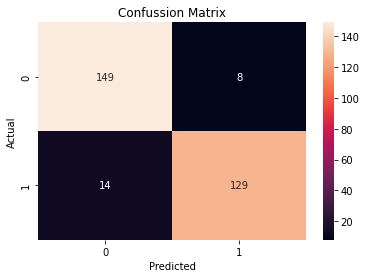

In [96]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d').set(title='Confussion Matrix')

In [97]:
# save the model to disk
filename = 'advertising_model.sav'
pickle.dump(logmodel, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9266666666666666
